In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv("driverData.csv")

In [7]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [8]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [10]:
data.shape

(4000, 3)

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

<Axes: >

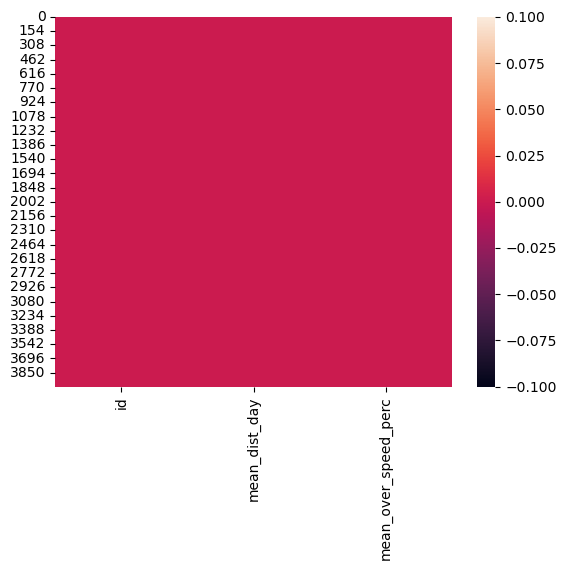

In [14]:
sn.heatmap(data.isnull())

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'mean_dist_day'}>],
       [<Axes: title={'center': 'mean_over_speed_perc'}>, <Axes: >]],
      dtype=object)

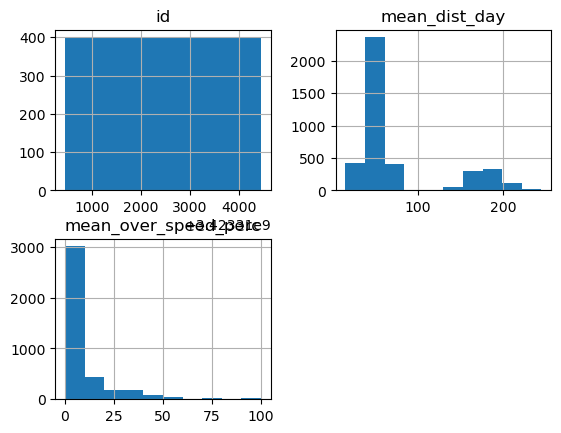

In [15]:
# Exploratory Data Analysis
data.hist()

C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


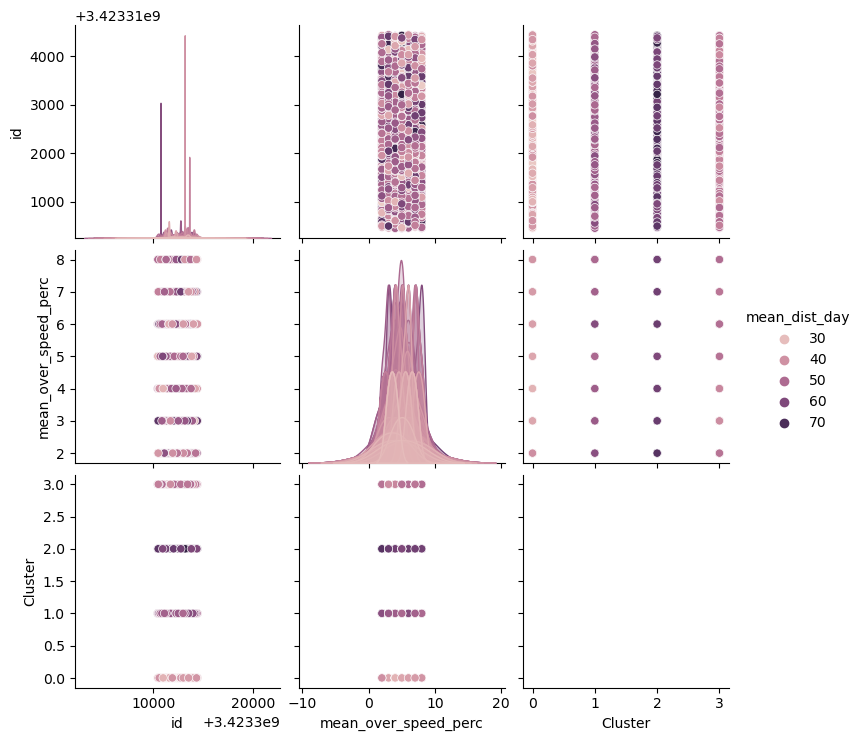

In [59]:
sn.pairplot(data,hue="mean_dist_day")

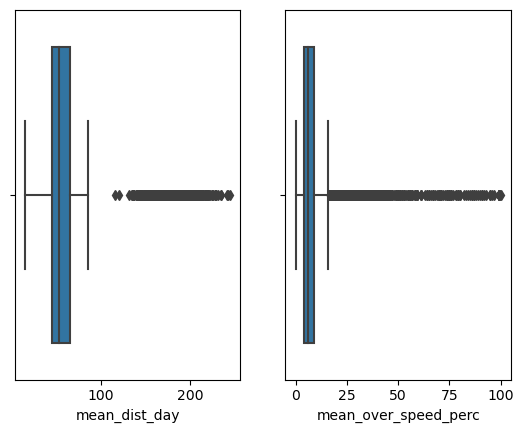

In [19]:
colName = ["mean_dist_day","mean_over_speed_perc"]
k=0
for i in colName:
    k=k+1
    plt.subplot(1,2,k)
    sn.boxplot(x=i,data=data)


In [25]:
#remove the Outlier

def removeOutlier(colName):
    Q1 = data[colName].quantile(0.25)
    Q3 = data[colName].quantile(0.75)
    IQR = Q3-Q1 #interquartile range
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return data.loc[ (data[colName]>lower_range) & (data[colName] < upper_range) ]

In [26]:
for j in colName:
    data =  removeOutlier(j)

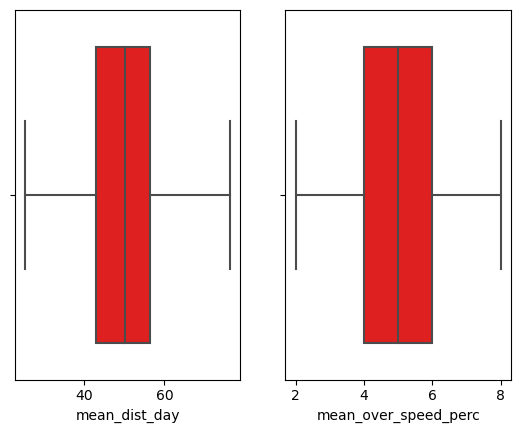

In [35]:
colName = ["mean_dist_day","mean_over_speed_perc"]
k=0
for i in colName:
    k=k+1
    plt.subplot(1,2,k)
    sn.boxplot(x=i,data=data,color='red')
    plt.xlabel(i)

In [39]:
X = data[colName].values
# use the Elbow method 
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)


C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

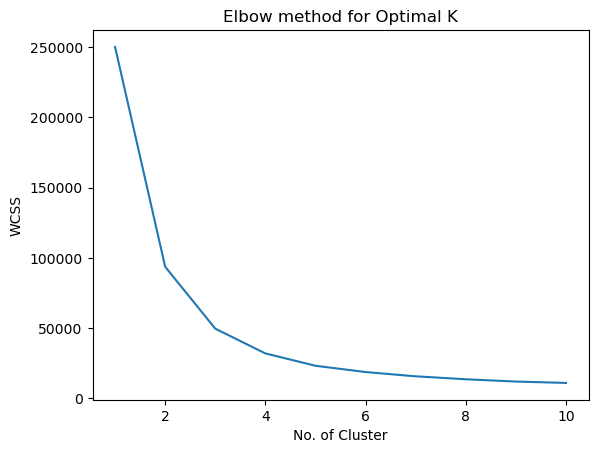

In [40]:
plt.plot(range(1,11),WCSS)
plt.title("Elbow method for Optimal K")
plt.xlabel("No. of Cluster")
plt.ylabel('WCSS')
plt.show()

In [64]:
elbow =5
kmeans = KMeans(n_clusters=elbow,init='k-means++',random_state=42)
Y = kmeans.fit_predict(X)

C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
data["Cluster"]=Y
print(Y)

[1 1 2 ... 3 0 1]


In [66]:
# Analyzing the cluster
print(data.groupby('Cluster').mean())

                   id  mean_dist_day  mean_over_speed_perc
Cluster                                                   
0        3.423312e+09      35.407281              5.053933
1        3.423312e+09      54.469412              5.024677
2        3.423312e+09      65.354242              4.961440
3        3.423312e+09      45.692967              5.032828


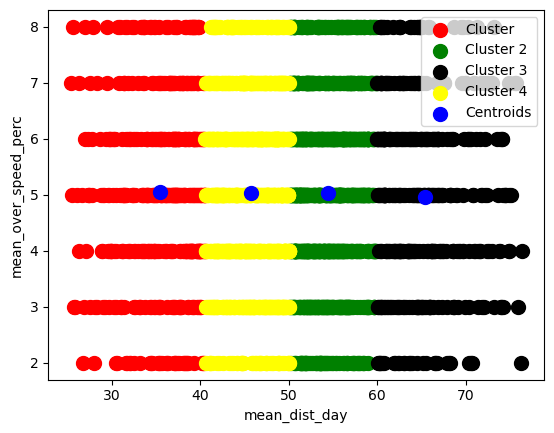

In [67]:
plt.scatter(X[Y == 0,0], X[Y == 0,1] ,s =100 ,c='red' ,label="Cluster")
plt.scatter(X[Y == 1,0], X[Y == 1,1] ,s =100 ,c='Green' ,label="Cluster 2")
plt.scatter(X[Y == 2,0], X[Y == 2,1] ,s =100 ,c='Black' ,label="Cluster 3")
plt.scatter(X[Y == 3,0], X[Y == 3,1] ,s =100 ,c='Yellow' ,label="Cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s =100 ,c="blue" ,label ='Centroids')
plt.xlabel("mean_dist_day")
plt.ylabel("mean_over_speed_perc")
plt.legend()
plt.show()

In [71]:
# sn.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='Cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

data.head()

,id,mean_dist_day,mean_over_speed_perc,Cluster
7,3423311434,52.02,8,1
58,3423310548,58.97,6,1
102,3423311066,67.23,5,2
111,3423311030,55.52,8,1
138,3423313633,52.37,6,1


<Axes: xlabel='Cluster'>

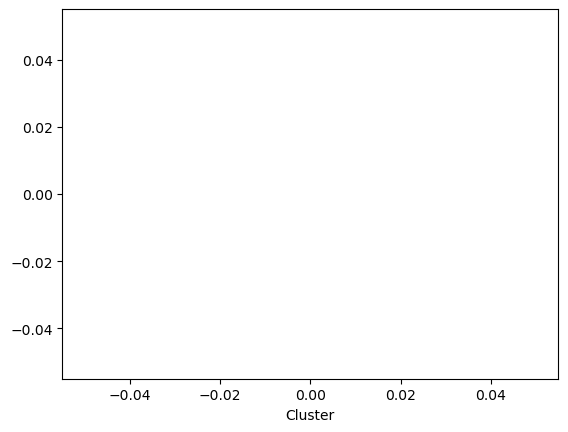

In [72]:
sn.scatterplot(x="Cluster",data=data)